In [1]:
import numpy as np
from scipy import stats
from ranker import CascadingBandits as CB
from ranker import CascadingDiscount as CD
from ranker import CascadingWindow as CW
from ranker import CascadingRexp3 as CR
from ranker import MergeRank as MR
from ranker import RankedEXP3 as RE3

from user import NonsataionaryCascadeUser
from user import NonsataionaryPBMUser

from _kllcb import kllcb as kl
from _klucb import klucb as kb

import os
import logging
import timeit 
import csv
import cPickle as pk
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
method = [CB, CD,  CW, RE3]
method_name = ['CascadeKL-UCB', 'CascadeDiscount-UCB', 'CascadeWindow-UCB', 'CascadeRexp3', 'CascadeDiscountKL-UCB', 'CascadeWindowKL-UCB']


In [3]:
from random import shuffle
cp = [0.4370, 0.5729, 0.1579, 0.2258, 0.1392, 0.1446, 0.0938, 0.0400, 0.0682, 0.0238]
kappa = [0.99997132, 0.95949374, 0.76096783]
p_stop = [0.6555304, 0.4868164, 0.46051615]#, 0.46315161, 0.45642676] + [0.6555304, 0.4868164, 0.46051615, 0.46315161, 0.45642676]


l = len(cp)
k = len(kappa)

iterations = 10000


ranker = [CB(range(l), kappa[:], 'klucb', 3)]
ranker += [CD(range(l), kappa[:], 5, 'ucb', 0.5, T=iterations)]
ranker += [CW(range(l), kappa[:], 5, 'ucb', 0.5,  T=iterations)]
# ranker += [CD(range(l), kappa[:], 5, 'klucb', 3,  T=iterations)]
# ranker += [CW(range(l), kappa[:], 5, 'klucb', 3,  T=iterations)]
ranker += [RE3(range(l), kappa[:], 'ucb', 0.2,  T=iterations)]

# ranker = [MR(range(l), kappa[:], 'klucb', 3, T=iterations)]
cm_user = NonsataionaryCascadeUser(cp, kappa, p_stop, 10000*len(ranker))


In [4]:
regret = np.zeros((len(ranker), iterations))
n_top = 3
user = cm_user
start_time = timeit.default_timer()
for i in range(iterations):
    for idx_bandit, click_bandit in enumerate(ranker):
        arms = click_bandit.get_arms()
        ck = user.get_click(arms[:n_top])
        click_bandit.update(ck, arms[:n_top])
        regret[idx_bandit, i] = user.pregret(arms[:n_top])
print timeit.default_timer() - start_time
cr = regret.cumsum(axis=1)
print cr[:, -1]

6.42090582848
[132.61736855 118.69532167 295.58917356 589.88269625]


[132.61736855 118.69532167 295.58917356 589.88269625]


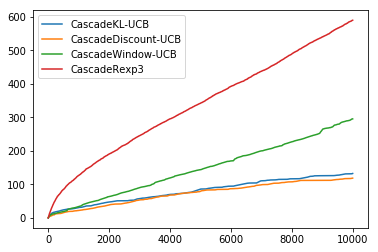

In [5]:
for idx, name in enumerate(ranker):
    plot(cr[idx,:])
plt.legend(method_name, loc=0)
print cr[:, -1]

In [93]:
iterations = int(1e4)
cp = [0.5, 0.4, 0.33]
arms = cp
ranker = [UCB(3), DUCB(3, iterations), WUCB(3, iterations)]
regret = np.zeros((len(ranker), iterations))

for i in range(iterations):    
    if i == 3000:
        arms = [0.5, 0.9, 0.3]
    if i == 5000:
        arms = cp
    for idx, rk in enumerate(ranker):
        arm = rk.get_arm()
        ck = 1 if arms[arm] > np.random.rand() else 0
        rk.update(ck, arm)
        regret[idx, i] = max(arms) - arms[arm]
        
    
cr = regret.cumsum(axis=1)    
    

# Slope

In [220]:
results = pk.load(open('results/nonstationary/100000/10/CM3.pkl'))
%matplotlib inline  


CascadeWKL-UCB 0.8874526765038937 -2.6103990465629536 0.9936409272033515
CascadeDUCB 0.8522674017687757 -1.9306660639688493 0.9952183756653635
MergeRank 0.9436898691975951 -1.5384390711074882 0.9923028333984635
CascadeDKL-UCB 0.88539954549532 -2.129745698317805 0.9971980781581423
CascadeKL-UCB 1.4471633560130508 -7.6704641058150465 0.9718344716208908
RankedEXP3 0.9968320362053052 -2.5339093721870567 0.9822934093765191
CascadeWUCB 0.8857300567172166 -2.5561729776196556 0.9933266832753137


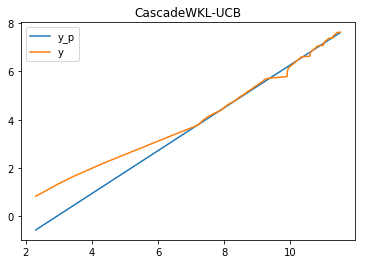

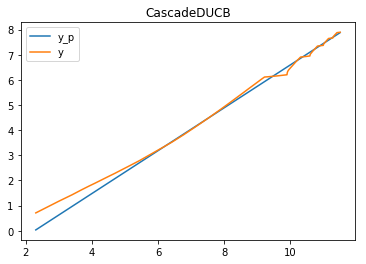

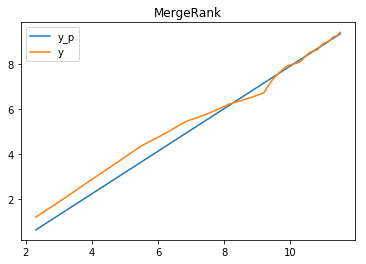

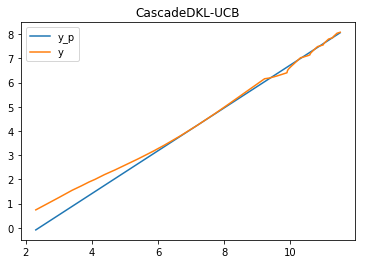

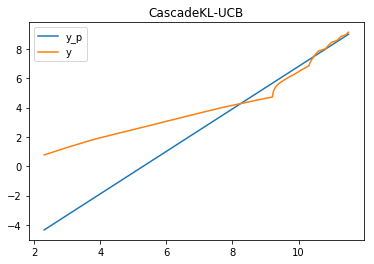

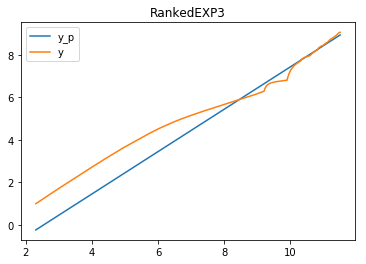

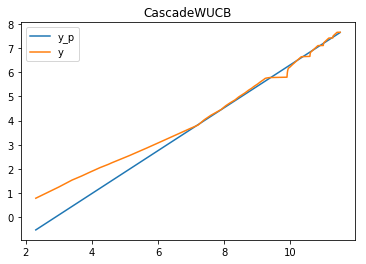

In [244]:
for key in results:
    regret = results[key]['Regret'][0]
    x = (np.arange(vr.shape[0]) + 1) * 10
    x = np.log(x)
    y = np.log(regret)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    print key, slope, intercept, r_value
    plt.figure()
    plot(x, x*slope + intercept)
    plot(x, y)
    plt.legend(['y_p', 'y'])
    plt.title(key)

In [236]:
x = (np.arange(vr.shape[0]) + 10) * 1
y = np.sqrt(x*np.log(x))
x = np.log(x)
y = np.log(y)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print slope, intercept, r_value
   

0.5706656696078164 0.4680995829680059 0.9998330347994536


array([0.        , 0.69314718, 1.09861229, ..., 9.21014035, 9.21024037,
       9.21034037])

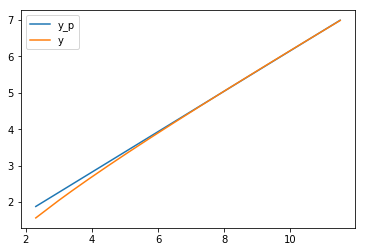

In [217]:
plot(x, x*slope + intercept)
plot(x, y)
plt.legend(['y_p', 'y'])

2.031

In [14]:
f = open('results/nonstationary/100000/10/CM3.pkl')


In [15]:
a = pk.load(f)

In [16]:
a.keys()

['CascadeWKL-UCB',
 'NewCascadeWUCB',
 'CascadeDUCB',
 'CascadeWUCB0',
 'RankedEXP3',
 'CascadeDKL-UCB',
 'CascadeKL-UCB',
 'CascadeWUCB',
 'MergeRank',
 'CascadeDUCB0',
 'NewCascadeWUCB0']

In [20]:
a['CascadeWUCB'] = a.pop('NewCascadeWUCB')

In [22]:
f = open('results/nonstationary/100000/10/CM3.pk', 'wb')
pk.dump(a, f)
f.close()